##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------
***Team number:***
6
---
(*In Title case, separated with commas*)
***Full names of all students in the team:***
Vidhi Shah, Isha Pargaonkar, Vipanchi Dixit, Shreenidhi Ramaswamy, Shramana Ghosh

---
(*Separated by commas*)
***Id number of all students in the team:***
2021A3PS2645H, 2021A3PS2803H, 2021A3PS2983H, 2021A3PS0946H, 2021A7PS1834H

This assignment aims to identify the differences between three sets of Machine Learning models.

# **_1. Dataset Generation_**

You are given a sample Diabetes dataset. Using this, please develop your own dataset consisting of 500 records. You can use the given code to generate your own dataset. Submit the generated dataset as a .csv file along with your python notebook.

In [719]:
!pip install sdv
!pip install urllib3==1.26

ERROR: Operation cancelled by user


In [720]:
from sdv.datasets.local import load_csvs

datasets = load_csvs(folder_name='/content/')
df = datasets['Diabetes_dataset']

/usr/local/lib/python3.10/dist-packages/sdv/datasets/local.py:31: UserWarning: Ignoring incompatible files ['my_synthesizer.pkl'] in folder '/content/'.
  warnings.warn(


In [721]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_csv(filepath='/content/Diabetes_dataset.csv')

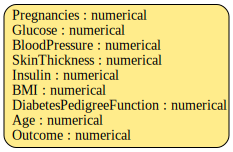

In [722]:
metadata.visualize()

In [723]:
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

In [724]:
synthesizer.fit(
    data=datasets['Diabetes_dataset']
)

ContextualVersionConflict: ignored

In [ ]:
df.head()

In [ ]:
synthetic_data = synthesizer.sample(
    num_rows=500
)
synthetic_data.head()

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    df,
    synthetic_data,
    metadata
)

In [ ]:
synthesizer.save('my_synthesizer.pkl')

synthesizer = SingleTablePreset.load('my_synthesizer.pkl')

In [ ]:
synthetic_data

In [ ]:
synthesizer
synthetic_data.to_csv('Diabetes_Dataset.csv')





# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***

In [725]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics


In [726]:
gdf=pd.read_csv('Diabetes_Dataset.csv')
gdf.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,7,149,96,19,10,38.387409,0.561331,40,1
1,1,0,151,44,6,105,26.125923,0.463959,27,1
2,2,3,169,57,24,240,33.224573,0.541364,36,0
3,3,4,86,61,35,0,32.918264,0.526311,39,0
4,4,6,75,62,31,77,37.453830,0.178734,21,0


In [727]:
gdf.isna().sum()
# there are no Nan values in the dataset generated

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [728]:
gdf.isnull().sum()
# there are no null values in the dataset generated

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [729]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                500 non-null    int64  
 1   Pregnancies               500 non-null    int64  
 2   Glucose                   500 non-null    int64  
 3   BloodPressure             500 non-null    int64  
 4   SkinThickness             500 non-null    int64  
 5   Insulin                   500 non-null    int64  
 6   BMI                       500 non-null    float64
 7   DiabetesPedigreeFunction  500 non-null    float64
 8   Age                       500 non-null    int64  
 9   Outcome                   500 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 39.2 KB


In [730]:
gdf.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000
mean,249.500000,4.006000,120.454000,71.080000,21.778000,97.290000,32.518053,0.511352,34.4500,0.330000
std,144.481833,3.052967,33.702754,18.964517,13.916467,92.202932,7.887027,0.299594,10.0826,0.470684
min,0.000000,0.000000,14.000000,22.000000,0.000000,0.000000,10.903340,0.078000,21.0000,0.000000
25%,124.750000,2.000000,98.000000,58.000000,11.000000,1.000000,27.161187,0.255483,27.0000,0.000000
50%,249.500000,4.000000,120.500000,71.000000,22.000000,78.000000,32.593184,0.508918,33.0000,0.000000
75%,374.250000,6.000000,145.000000,85.000000,32.000000,165.000000,37.500736,0.735819,41.0000,1.000000
max,499.000000,17.000000,199.000000,122.000000,55.000000,378.000000,59.937412,1.413874,73.0000,1.000000


In the code block below, we have replaced the vaules of SkinThickness which were 0 in the original dataset by their mean as skin thickness cannot be 0.

In [731]:
column=gdf['SkinThickness']
column.replace(to_replace = 0, value = column.mean(), inplace=True)
gdf['SkinThickness']

0      19.0
1       6.0
2      24.0
3      35.0
4      31.0
       ... 
495    46.0
496    28.0
497    38.0
498    49.0
499    22.0
Name: SkinThickness, Length: 500, dtype: float64

In [732]:
dataset=(gdf-gdf.min())/(gdf.max()-gdf.min())
X=dataset.drop(['Outcome', 'Unnamed: 0'], axis=1)
y=dataset.Outcome
dataset2=dataset.drop(['Unnamed: 0'], axis=1) #dataset without the 'Unnamed: 0' column

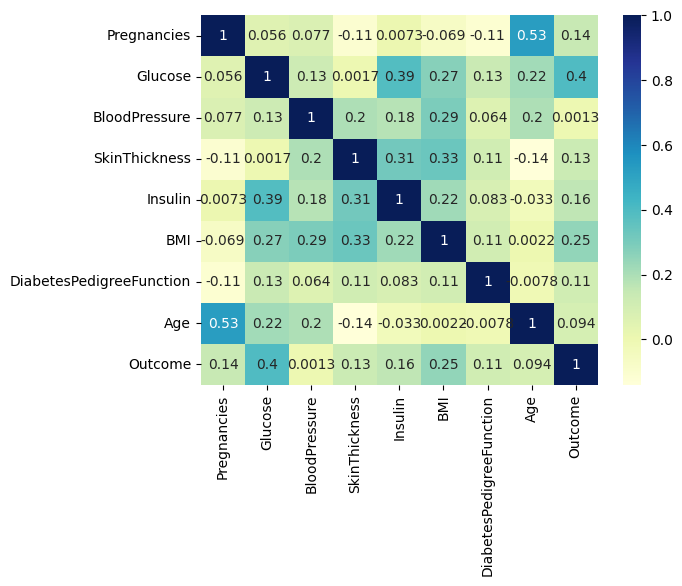

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.411765,0.729730,0.74,0.333333,0.026455,0.560510,0.361809,0.365385,1.0
1,0.000000,0.740541,0.22,0.092593,0.277778,0.310449,0.288919,0.115385,1.0
2,0.176471,0.837838,0.35,0.425926,0.634921,0.455219,0.346862,0.288462,0.0
3,0.235294,0.389189,0.39,0.629630,0.000000,0.448972,0.335594,0.346154,0.0
4,0.352941,0.329730,0.40,0.555556,0.203704,0.541470,0.075407,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
495,0.000000,0.470270,0.65,0.833333,0.785714,0.567543,0.257074,0.000000,0.0
496,0.235294,0.594595,0.50,0.500000,0.071429,0.462390,0.413268,0.557692,0.0
497,0.235294,0.902703,0.13,0.685185,0.658730,0.494231,0.267186,0.269231,1.0
498,0.235294,0.745946,0.59,0.888889,0.436508,0.525994,0.556111,0.461538,1.0


In [733]:
#correlation visualization
dataplot = sns.heatmap(dataset2.corr(), cmap="YlGnBu", annot=True)
plt.show()
dataset2

In [734]:
gdf['Outcome'].value_counts()

0    335
1    165
Name: Outcome, dtype: int64

As we can see from the preprocessed data, the data samples for 1 are almost twice as less than the samples for 0. Hence, this irregularity could lower accuracy of the models.

In [735]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=9)

# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## **_Stochastic Gradient Descent_**

In [736]:
Y=np.array(dataset.iloc[0:,9:])

df = dataset.drop('Outcome', axis=1)

#scaling the data
dataset = (df-df.min())/(df.max()-df.min())

X=dataset.iloc[0:,1:9]

#adding bias column
X['D']=1
X=np.array(X)

#applying train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, Y,train_size=0.8, test_size=0.2,random_state=9)

w=np.zeros(9) #initialize the weight vector
lr=0.001 #lr=learning rate
iter=1000
N=len(X) #N= total number of samples
n=len(x_train) #n = number of samples in the training dataset
sgd_cost_list=[] #list recording the error after each iteration
sgd_epoch_list=[] #list recording the iteration count

#define cost function
def costfn(X,Y,w):
  error=0
  for i in range(n):
    x=X[i]
    y=Y[i]
    h=(w.T).dot(x) #formulating the hypothesis
    error+=(h-y)**2
  error = (1/n)*error #computing the error
  sgd_cost_list.append(error) #adding error value to the cost list

#Stochastic descent
def stochastic_des(X,Y,w,lr,iter,n):
  for m in range(iter):
    sum=np.zeros(9)
    j=random.randint(0,n-1) #picking a random sample from the dataset
    x=X[j]
    y=Y[j]
    h=(w.T).dot(x) #computing hypothesis
    sum=(h-y)*x #computing derivative of cost function
    w=w-(lr*sum)
    costfn(X,Y,w)
    sgd_epoch_list.append(m)
  return w

w_new=stochastic_des(x_train, y_train, w,lr,iter,n)

test=len(y_test)
#y_pred=np.ones(test)
y_p=np.arange(test)
y_pred=y_p.reshape(test,1)

def Linear_Regression(x_test,test):
  for i in range(test):
    y_pred[i] = np.round(abs((w_new.T).dot(x_test[i])))
  return y_pred

y_pred=Linear_Regression(x_test,test)
mse= mean_squared_error(y_test,y_pred)
def accuracy(y_pred,y_test):
    return np.sum(y_pred==y_test)/len(y_test)
final_accuracy=accuracy(y_pred,y_test)
print(f"mse:", mse)
print(f"Accuracy : {final_accuracy: .2f}")
print(f"Weights:", w_new)

mse: 0.36
Accuracy :  0.64
Weights: [0.04293597 0.09538799 0.0524842  0.05182083 0.04422385 0.05847898
 0.05159613 0.04094278 0.11307163]


## **_Batch Gradient Descent_**

In [737]:
w=np.zeros(9) #initialize the weight vector
lr=0.001 #lr=learning rate
iter=1000
N=len(X) #N= total number of samples
n=len(x_train) #n = number of samples in the training dataset

bgd_cost_list=[] #list recording the error after each iteration
bgd_epoch_list=[] #list recording the iteration count

In [738]:
def costfn(X,Y,w):
  error=0
  for i in range(n):
     x=X[i]
     y=Y[i]
     h=(w.T).dot(x) #formulating the hypothesis
     error += (h-y)**2
  error=(1/n)*error #computing the error
  bgd_cost_list.append(error) #adding error value to the cost list
  return error

#Gradient descent
def grad_des(X,Y,w,lr,iter,n):
  for m in range(iter):
    sum=np.zeros(9)
    for i in range(n):
      x=X[i]
      y=Y[i]
      h=(w.T).dot(x) #formulating the hypothesis
      sum+=(h-y)*x #computing derivative of cost function

    w=w-(lr*sum)
    costfn(x_train,y_train,w)
    bgd_epoch_list.append(m)
  return w

w_new=grad_des(x_train, y_train, w,lr,iter,n)


In [739]:
test=len(y_test)
y_p=np.arange(test)
y_pred=y_p.reshape(test,1)

def Linear_Regression(x_test,test):
  for i in range(test):
    y_pred[i] = np.round(abs((w_new.T).dot(x_test[i])))
  return y_pred

y_pred=Linear_Regression(x_test,test)
mse= mean_squared_error(y_test,y_pred)
def accuracy(y_pred,y_test):
    return np.sum(y_pred==y_test)/len(y_test)
final_accuracy=accuracy(y_pred,y_test)

print(f"mse:", mse)
print(f"Accuracy : {final_accuracy: .2f}")
print(f"Weights:", w_new)

mse: 0.28
Accuracy :  0.72
Weights: [ 0.53361169  0.9989401  -0.29022008  0.20614123 -0.10371824  0.38984752
  0.15398813 -0.12610462 -0.47588348]


## **_Insights drawn (plots, markdown explanations)_**

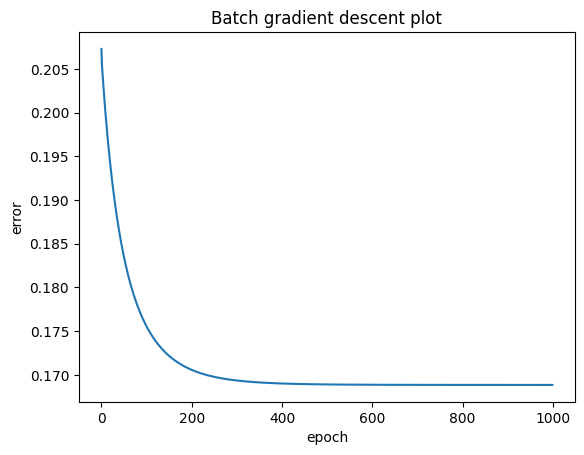

In [740]:
plt.title("Batch gradient descent plot")
plt.xlabel("epoch")
plt.ylabel("error")
plt.plot(bgd_epoch_list,bgd_cost_list)

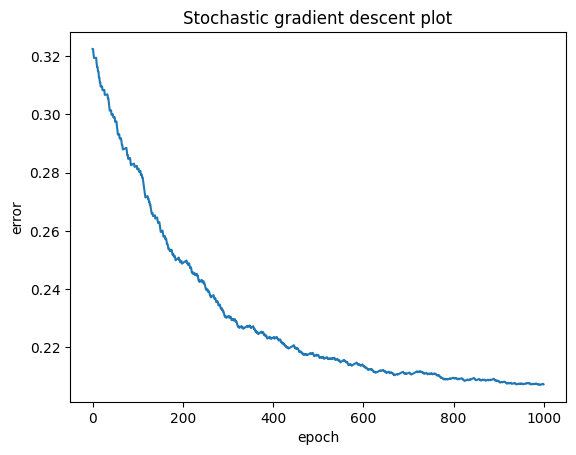

In [741]:
plt.title("Stochastic gradient descent plot")
plt.xlabel("epoch")
plt.ylabel("error")
plt.plot(sgd_epoch_list,sgd_cost_list)

Stochastic Gradient Descent has lesser accuracy then Batch Gradient Descent. This is because Batch Gradient Descent updates the weights by considering the entire batch every iteration. On the other hand, Stochastic Grasient Descent picks a training sample at random in each iteration in order to update the weights. As a result, Batch gradient descent systematically
reduces error while stochastic gradient descent takes a more random approach.

---



# **_4. Comparison of Lasso and Ridge Regression using Polynomial Regression_**

## **_Lasso Regression_**

In [744]:
class LassoReg():

    # initializing the hyperparameters
    def __init__(self, lr, iters, Lambda ,degree):
        self.lr = lr
        self.iters = iters
        self.Lambda = Lambda
        self.degree = degree

    def generate_polynomial_features(X, degree):
      #generating a polynomial in the form x+x^2+.....
      X_poly = np.zeros((X.shape[0], degree))
      for i in range(1, degree + 1):
        X_poly[:, i - 1] = X ** i
        return X_poly

    def fit(self, X_poly, y):
      #N---> no of data points = no of rows
      #features---> no of input features = no of coloumn
      self.N,self.features = X_poly.shape
      #W = weights
      #B = bias
      self.W = np.zeros(self.features)
      self.B = 0
      self.X_poly = X_poly
      self.y = y
      # Implementing Gradient Descent algorithm for Optimization
      for i in range(self.iters):
        self.updateWeights()

      #function  updating the value of weights and bias  for each value of x
    def updateWeights(self):
      y_pred = self.predict(self.X_poly)
      dW = np.zeros(self.features)
      # gradient loop for weights
      for i in range(self.features):
        if self.W[i] > 0:
            dW[i] = (-(2 * (self.X_poly[:, i]).dot(self.y - y_pred)) + self.Lambda) / self.N
        else:
            dW[i] = (-(2 * (self.X_poly[:, i]).dot(self.y - y_pred)) - self.Lambda) / self.N

            # gradient update for bias
            dB = -2 * np.sum(self.y - y_pred) / self.N

            self.W = self.W - self.lr * dW
            self.B = self.B - self.lr * dB

    # predicting the value of target variable
    def predict(self, X_poly):
      return X_poly.dot(self.W) + self.B





In [766]:
dataset=(gdf-gdf.min())/(gdf.max()-gdf.min())
X=dataset.drop(['Outcome', 'Unnamed: 0'], axis=1)
y=dataset.Outcome
dataset2=dataset.drop(['Unnamed: 0'], axis=1) #dataset without the 'Unnamed: 0' column

X=dataset.iloc[:,:].values
y=dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=9)
model = LassoReg(lr=0.039, iters =1000,Lambda=1,  degree=3)
#Training the model with training samples
model.fit(X_train, y_train)

#Making pradictions of the trained model using the tesing smaples
y_pred = model.predict(X_test)

In [767]:
squared_error = (y_test - np.round(y_pred)) ** 2
mse = np.mean(squared_error)

print(f"Mean Squared Error (MSE): {mse: .2f}")

Mean Squared Error (MSE):  0.36


In [768]:
mse=mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error (MSE): {mse: .2f}")

Mean Squared Error (MSE):  0.23


As we can see, the difference in value of MSE calculated from scratch and that from the sklearn inbuilt function is negligible.

## **_Ridge Regression_**

In [769]:
dataset=(gdf-gdf.min())/(gdf.max()-gdf.min())
X=dataset.drop(['Outcome', 'Unnamed: 0'], axis=1)
y=dataset.Outcome
dataset2=dataset.drop(['Unnamed: 0'], axis=1) #dataset without the 'Unnamed: 0' column
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=9)

In [770]:
class RidgeReg:

   # initializing the hyperparameters
    def __init__(self, alpha, degree):
        self.alpha = alpha
        self.degree = degree
        self.coef = None
        self.intercept = None

    #generating a polynomial in the form x+x^2+.....
    def gen_poly_features(self, X):
        X_poly = X.copy()
        for i in range(2, self.degree + 1):
            X_poly = np.concatenate((X_poly, X ** i), axis=1)
        return X_poly

    def fit(self, X_train, y_train):
        X_train_poly = self.gen_poly_features(X_train)

        X_train_modify = np.insert(X_train_poly, 0, 1, axis=1) # modifying the features (X) matrix to include a column of ones for the bias


        I = np.identity(X_train_modify.shape[1])
        I[0][0] = 0 #making the top leftmost element 0 to avoid penalising the y intercept

        #calculating the ridge coeficient
        b_rr = np.linalg.inv(np.dot(X_train_modify.T, X_train_modify) + self.alpha * I).dot(X_train_modify.T).dot(y_train)
        self.intercept = b_rr[0]
        self.coef = b_rr[1:]

    def predict(self, X_test):
        X_test_poly = self.gen_poly_features(X_test)
        return np.dot(X_test_poly, self.coef) + self.intercept

    #calculating mean squared error
    def mse(self, y_true, y_pred):
        return mean_squared_error(y_true, y_pred)


In [771]:
degree_R=3
ridge_reg = RidgeReg(alpha=0.039, degree=degree_R)

#Training the model with training samples
ridge_reg.fit(X_train, y_train)

#Making pradictions of the trained model using the tesing smaples
y_pred = ridge_reg.predict(X_test)

#calculating the mean square error
mse = ridge_reg.mse(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse: .2f}")

Mean Squared Error (MSE):  0.19


## **_Insights drawn (plots, markdown explanations)_**

L1 and L2 regularisation are used to ensure no overfitting or underfitting occurs while performing polynomial regression.
To determine the optimal values of learning rate and L1,L2 penalties we have run the model with different combinations and chosen the optimal set.
From the models we have developed, the Mean Squared Error (MSE) for Lasso Regression () is 0.28 and that for Ridge Regression() it is 0.19.
Possible reasons for this differnece could be that L1 handles outliers better as it can perform feature selection, unlike L2 in which the weights tend to 0 but are not exactly 0.


As observed from the correlation visualization,  Glucose is the feature that is the most correlated with the Outcome. Hence, we draw plots between the predicted value (Y) and Glucose (X).

In [772]:
X_new=X_test['Glucose']

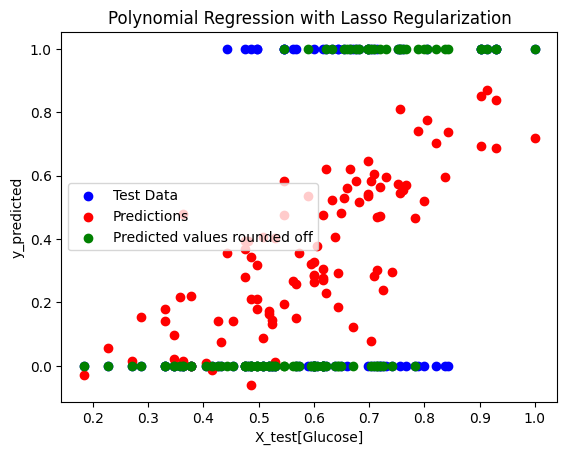

In [773]:
# LASSO Regression Plot
plt.scatter(X_new, y_test, label="Test Data", color="b")
plt.scatter(X_new, y_pred, label="Predictions", color="r")
plt.scatter(X_new, y_pred.round(), label="Predicted values rounded off", color="g")
plt.title("Polynomial Regression with Lasso Regularization")
plt.xlabel("X_test[Glucose]")
plt.ylabel("y_predicted")
plt.legend()
plt.show()

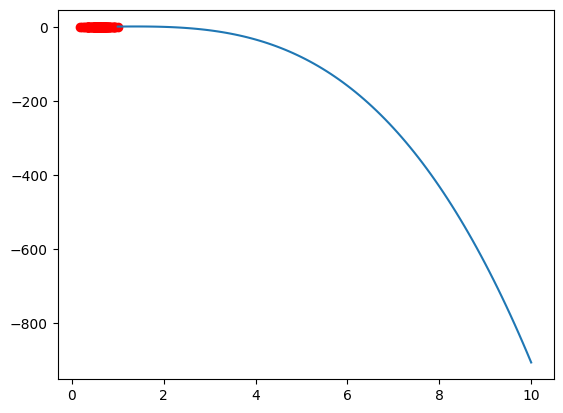

In [774]:
mymodel = np.poly1d(np.polyfit(X_new,y_pred,3))
myline= np.linspace(1,10,100)
plt.plot(myline,mymodel(myline))
plt.scatter(X_new,y_pred,color='r')
plt.show()

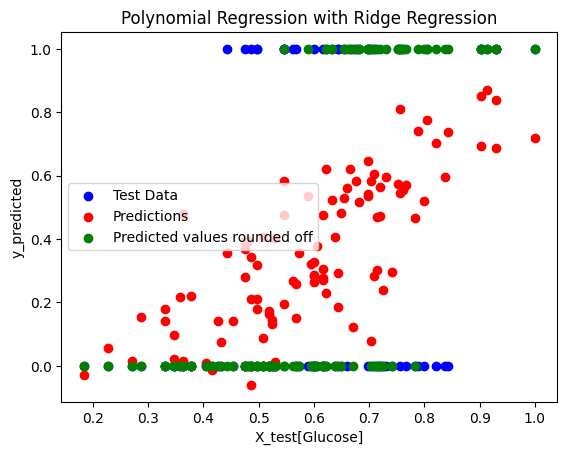

In [775]:
# Ridge Regression Plot
plt.scatter(X_new, y_test, label="Test Data", color="b")
plt.scatter(X_new, y_pred, label="Predictions", color="r")
plt.scatter(X_new, y_pred.round(), label="Predicted values rounded off", color="g")
plt.title("Polynomial Regression with Ridge Regression")
plt.xlabel("X_test[Glucose]")
plt.ylabel("y_predicted")
plt.legend()
plt.show()


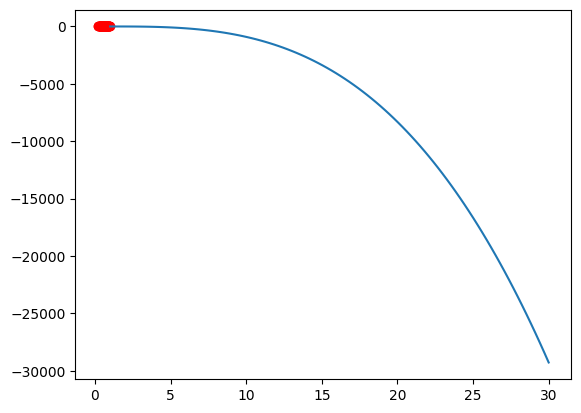

In [776]:
mymodel = np.poly1d(np.polyfit(X_new,y_pred,degree_R))
myline= np.linspace(1,30,100)
plt.plot(myline,mymodel(myline))
plt.scatter(X_new,y_pred,color='r')
plt.show()

# **_5. Comparison of Logistic Regression and Least Squares Classification_**

## **_Logistic Regression_**

In [777]:
dataset=(gdf-gdf.min())/(gdf.max()-gdf.min())
X=dataset.drop(['Outcome', 'Unnamed: 0'], axis=1)
y=dataset.Outcome
dataset2=dataset.drop(['Unnamed: 0'], axis=1) #dataset without the 'Unnamed: 0' column
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=50)

In [787]:
#using sigmoid function as the activation function
def sigmoid(X):
    return 1/(1+np.exp(-X))

#creating logistic regression model from scratch
class LogReg():
    #constructor for initialising paramemters
    def __init__(self,lr=0.01, iters=8000):
        self.lr=lr
        self.iters=iters
        self.Weights=None
        self.Bias=None

    #method to train and fit the training data
    def fit(self,X,y):
        N, features = X.shape
        self.Weights=np.zeros(features)
        self.Bias=0

        for i in range(self.iters):
            linear_pred = np.dot(X, self.Weights)+self.Bias
            predictions=sigmoid(linear_pred)

            dW = (1/N)*np.dot(X.T,predictions-y)
            dB = (1/N)*np.sum(predictions-y)

            self.Weights=self.Weights-self.lr*dW
            self.Bias=self.Bias=self.lr*dB

    #method to predict outcome on testing data after model is trained
    def predict(self,X):
        linear_pred = np.dot(X, self.Weights)+self.Bias
        y_pred=sigmoid(linear_pred)
        final_pred=[0 if y<0.5 else 1 for y in y_pred]
        return final_pred

In [788]:
logReg=LogReg()
#Training the model with training samples
logReg.fit(X_train,y_train)
#Making pradictions of the trained model using the tesing smaples
y_pred=logReg.predict(X_test)


In [790]:
#evaluating efficiency of model
def accuracy(y_pred,y_test):
    return np.sum(y_pred==y_test)/len(y_test)
acc=accuracy(y_pred,y_test)
print(acc)

0.59


In [791]:
acc=accuracy_score(y_test,y_pred)
print(f"F1 score: {acc: .2f}")
print(f"F1 score: {f1_score(y_test,y_pred): .2f}")

F1 score:  0.59
F1 score:  0.28


As we can see, the difference in accuracy calculated from scratch and that from the sklearn inbuilt function is negligible.


## **_Least Squares Classification_**

In [792]:
dataset=(gdf-gdf.min())/(gdf.max()-gdf.min())
X=dataset.drop(['Outcome', 'Unnamed: 0'], axis=1)
y=dataset.Outcome
dataset2=dataset.drop(['Unnamed: 0'], axis=1) #dataset without the 'Unnamed: 0' column
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=9)

In [793]:
class LeastSquareClassification():
    def __init__(self):
        self.t0 = 20
        self.t1 = 1000

    def predict(self, X):
        if X.shape[-1] != self.w.shape[0]:
          print("Shape of x and w not complatible")
        #assert X.shape[-1] == self.w.shape[0], f"X shape{X.shape} and w shape {self.w.shape}, are not compatible"
        return X @ self.w

    def loss(self, X, y, reg_rate):
        e = y - self.predict_internal(X)
        return (1/2) * (e.T@e) + (reg_rate/2)*(self.w).T@(self.w)


    def predict_internal(self, X):
        if X.shape[-1] != self.w.shape[0]:
          print("Shape of x and w not complatible")
        #assert X.shape[-1] == self.w.shape[0], f"X shape {X.shape} and w shape {self.w.shape}, are not compatible"
        return X@self.w

    def rmse(self, X, y):
        return np.sqrt(2/X.shape[0] * self.loss(X, y, 0))

    def fit(self, X, y, reg_rate):
        eye = np.eye(X.shape[1])
        self.w = np.linalg.solve(reg_rate*eye + X.T@X, X.T @ y)
        return self.w

    def calculate_gradient(self, X, y, reg_rate):
        grad = X.T @  (self.predict_internal(X)-y) + reg_rate * self.w
        return grad

    def update_weight(self, grad, lr) -> np.ndarray:
        return(self.w - lr*grad)

    def learning_schedule(self, t):
        return self.t0/(t+self.t1)

    def gd(self, X, y, epochs, lr, reg_rate):
        self.w = np.zeros(X.shape[1])
        self.w_all = []
        self.err_all = []
        for i in np.arange(0, epochs):
            djdw = self.calculate_gradient(X, y, reg_rate)
            lr = self.learning_schedule(epochs*X.shape[0]+i)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y, reg_rate))
            self.w = self.update_weights(djdw, lr)
        return self.w

In [794]:
lsc = LeastSquareClassification()
lsc.fit(X_train,y_train,0.39)
y_pred=lsc.predict(X_test)
y_pred=np.round(y_pred)
def accuracy(y_pred,y_test):
    return np.sum(y_pred==y_test)/len(y_test)
acc=accuracy(y_pred,y_test)
print(f"Accuracy: {acc: .2f}")
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc: .2f}")
print(f"F1 score: {f1_score(y_test,y_pred): .2f}")


Accuracy:  0.70
Accuracy:  0.70
F1 score:  0.48


## **_Insights drawn (plots, markdown explanations)_**

Text(0, 0.5, 'Sigmoid f(x)')

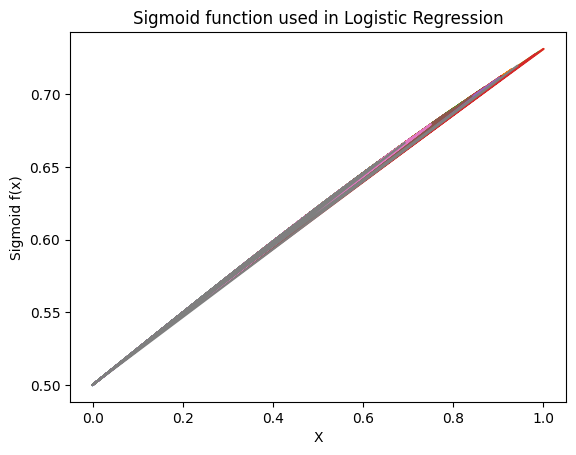

In [795]:
plt.title("Sigmoid function used in Logistic Regression")
y=sigmoid(X_test)
plt.plot(X_test,y)
plt.xlabel("X")
plt.ylabel("Sigmoid f(x)")

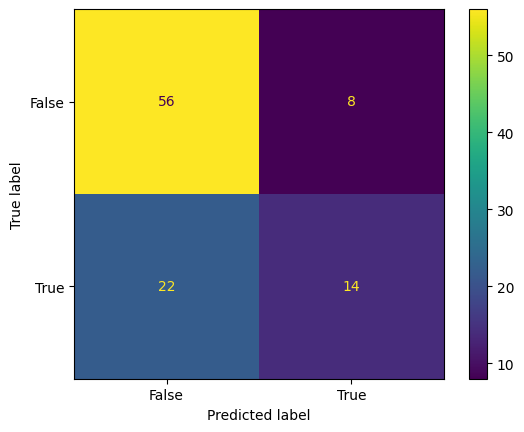

In [796]:
# Data visualisation for Least Square Classification
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

As seen from the models the accuracy of both Logistic regression and Least square classification is around 70% with least square classification performing slightly better according to samples of dataset provided

# **_5. References_**

1.   Christopher Bishop: Pattern Recognition and Machine Learning, Springer International Edition (Chapter 3,4)
2.  [Ridge and Lasso Regression Indepth Intuition](https://www.youtube.com/watch?v=9lRv01HDU0s)
3. [StatQuest: Logistic Regression](https://www.youtube.com/watch?v=yIYKR4sgzI8)
4. [ Logistic Regression Indepth Intuition](https://www.youtube.com/watch?v=L_xBe7MbPwk)
5. [Stochastic Gradient Descent vs Batch Gradient Descent vs Mini Batch Gradient Descent](https://youtu.be/IU5fuoYBTAM?feature=shared)
6. [NumPy documentation](https://numpy.org/doc/)
7. [Pandas documentation](https://pandas.pydata.org/docs/)
8. [matplotlib documentation](https://matplotlib.org/stable/index.html)
9.
